<a href="https://colab.research.google.com/github/wldud01/Naver_Boost_Study_13th/blob/main/%5Bboostcourse%5DWeek1_Mission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# boost course -data science school
- 강의 1일차
  - 데이터분석 준비
  - python basic

## 1주차 미션
(별 내용은 없지만 이것 저것 끄적끄적.. 해보았습니다..!)


## 문제4
  📌Q4. 앞으로 우리는 공공데이터포털에서 데이터를 다운로드 받아 과정을 진행할 예정입니다. 본격적인 학습 이전에! 데이터를 다루는 방법이 익숙해지도록 한번 더 연습해보고, 어떤 문제를 풀 수 있을지도 함께 고민해보아요!


In [ ]:
# 경로 안에 포함되는 경로 찾기
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

#file 경로
file_name = glob('drive/MyDrive/data/*')
file_name

['drive/MyDrive/data/블록별 성별연령대별 카드소비패턴.csv',
 'drive/MyDrive/data/블록별 시간대별소액결제건수 카드소비패턴.csv',
 'drive/MyDrive/data/집계구별 일별시간대별 카드소비패턴.csv']

In [ ]:
df = pd.read_csv(file_name[0],encoding='cp949')

In [ ]:
df.head()

,서울시민업종코드(UPJONG_CD),기준년월(YM),고객주소블록코드(BLOCK_CD),성별(GEDNER),연령대별(AGE),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,SS013,201906,14037,F,50대,48288,65
1,SS048,201608,156830,M,30대,132792,10
2,SS016,202009,32925,M,50대,100600,25
3,SS001,201805,214245,F,30대,213876,40
4,SS044,201705,279472,M,30대,155930,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   서울시민업종코드(UPJONG_CD)  500 non-null    object
 1   기준년월(YM)             500 non-null    int64 
 2   고객주소블록코드(BLOCK_CD)   500 non-null    int64 
 3   성별(GEDNER)           500 non-null    object
 4   연령대별(AGE)            500 non-null    object
 5   카드이용금액계(AMT_CORR)    500 non-null    int64 
 6   카드이용건수계(USECT_CORR)  500 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 27.5+ KB


In [ ]:
# 성별 남 0 여자 1로 처리
df['성별(GEDNER)'][df['성별(GEDNER)'] == 'F'] = 1
df.loc[df['성별(GEDNER)']=='M','성별(GEDNER)'] = 0

<ipython-input-7-95841227fa11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['성별(GEDNER)'][df['성별(GEDNER)'] == 'F'] = 1


In [ ]:
df['성별(GEDNER)'] = df['성별(GEDNER)'].astype(int)

In [ ]:
df.describe()

,기준년월(YM),고객주소블록코드(BLOCK_CD),성별(GEDNER),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
count,500.000000,500.000000,500.0000,5.000000e+02,500.000000
mean,201834.712000,209152.708000,0.4800,9.076369e+05,36.316000
std,163.529449,130034.568329,0.5001,2.952486e+06,72.176555
min,201601.000000,1700.000000,0.0000,1.500000e+01,5.000000
25%,201705.000000,147162.500000,0.0000,8.048000e+04,5.000000
50%,201810.000000,218893.500000,0.0000,2.384220e+05,10.000000
75%,202003.000000,320160.250000,1.0000,7.175545e+05,35.000000
max,202107.000000,502146.000000,1.0000,5.038501e+07,795.000000


<Axes: >

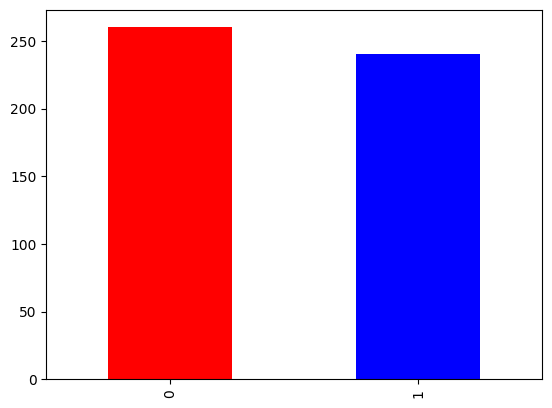

In [ ]:
# scale 확인해보기
sex_count = df['성별(GEDNER)'].value_counts()
sex_count.plot.bar(color=['red','blue'])

성별(GEDNER)
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: 카드이용건수계(USECT_CORR), dtype: object

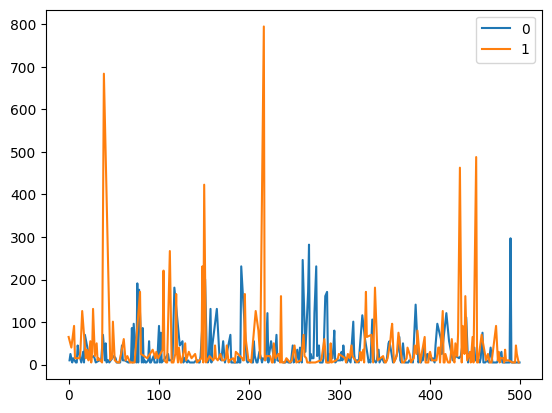

In [ ]:
df.groupby(df['성별(GEDNER)'])['카드이용건수계(USECT_CORR)'].plot(legend=['F','M'])

성별(GEDNER)
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: 카드이용금액계(AMT_CORR), dtype: object

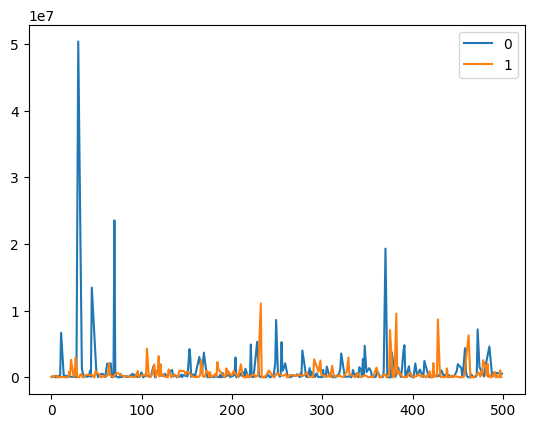

In [ ]:
df.groupby(df['성별(GEDNER)'])['카드이용금액계(AMT_CORR)'].plot(legend=['F','M'])

<Axes: xlabel='성별(GEDNER)'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


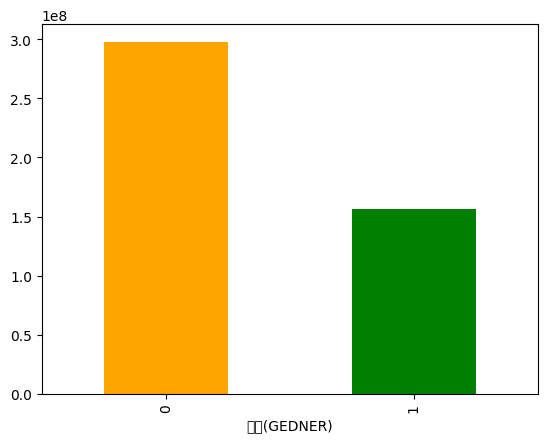

In [ ]:
# 성별별로 카도 이용금액의 총합
df.groupby('성별(GEDNER)')["카드이용금액계(AMT_CORR)"].sum().plot.bar(color=['orange','green'])

<Axes: xlabel='성별(GEDNER)'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


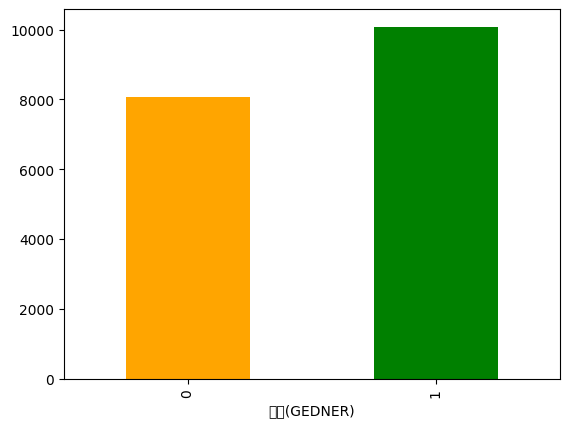

In [ ]:
# 성별별로 카드 이용건수계의 총합
df.groupby('성별(GEDNER)')["카드이용건수계(USECT_CORR)"].sum().plot.bar(color=['orange','green'])

In [ ]:
# 업종 종류
df['서울시민업종코드(UPJONG_CD)'].nunique()

65

  ### 분석 후 요약
    - 남여 중 카드 사용을 더 많이 할까?
      - 여자가 카드 이용 수는 더 많다.
      - 하지만 카드를 이용해서 결제하는 금액은 남자가 더 크다.

    추후 분석
    - 전체를 기준으로
      - 나이대는 어느 나이대가 많이 소비할까?
      - 업종별 나이대별 결제 빈도와 결제 금액

    - 왜 남자가 결제 금액이 더 클까?
      - 어떤 카테고리에 많이 쓸까? 결제 금액이 더 큰 이유와 상관관계가 있을까?
      - 나이대는 어느 나이대가 많이 소비할까?
      - 업종별 나이대별 결제 빈도와 결제 금액

    - 여자는 이용건 수가 남자보다 더 많은데도 불구하고 왜 금액은 더 작을까?
      - 어느 카테고리에 많이 사용할까?
      - 나이대는 어느 나이대가 많이 소비할까?
      - 업종별 나이대별 결제 빈도와 결제 금액


    - 업종, 결제 금액, 결제 빈도, 나이대가 주어지면 성별을 예측할 수 있는 인공지능을 만들어보면 좋을 것 같다

In [ ]:
# 추후에 추가 예정

## 문제 1
  📌Q1. 여러분은 파이썬을 통해 설문조사 문항의 응답내역을 분석하게 되었습니다. 문항별 응답내용에는 하나의 응답만 할 수 있는 single choice 문제와 여러 응답을 선택할 수 있는 multiple choice 문제가 있습니다. 2개를 구분하기 위해 single choice 문항 번호에 "_"를 표기하지 않기로 했습니다.

  문항별 응답내역이 'question'에 담겨 있을 때, 조건문과 반복문을 사용하여 아래와 같은 결과가 출력되도록 코드를 작성해보세요.

In [ ]:
# 응답 설문 문항
question = ['Q2', 'Q3', 'Q4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q6_6',
       'Q6_7', 'Q6_8', 'Q6_9', 'Q6_10', 'Q6_11', 'Q6_12', 'Q7_1', 'Q7_2',
       'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7', 'Q8', 'Q9', 'Q10_1', 'Q10_2',
       'Q10_3']
result = [res for res in question if "_" not in res]
print(result)

['Q2', 'Q3', 'Q4', 'Q5', 'Q8', 'Q9']


## 문제 2
  📌Q2. 한스 로슬링(Hans Rosling, 1948년 7월 27일 ~ 2017년 2월 7일)은 스웨덴의 의사이자 통계학자로 비영리 벤처 갭마인더 재단의 공동설립자이기도 합니다. 빅데이터를 가장 잘 활용하는 보건 통계학자로 알려져 있습니다. 베스트셀러 책인 "팩트풀니스" 저자이기도 합니다. 갭마인더 사이트에서는 연도별, 국가별 GDP와 기대수명 데이터를 제공하고 있는데, 대표적으로 파이썬 라이브러리 중 'seaborn'에서 제공되는 예제 데이터가 있습니다. 오늘은 이 데이터를 활용해 문제를 풀어보겠습니다.
  다음의 데이터는 연도, 국가별 기대수명을 나타내고 있는 데이터 입니다. 2011년 부터의 연도별, 국가별 평균 기대수명을 구해주세요. (2011년도 포함되게 구합니다.)

  [필수 조건]
  - groupby 나 pivot_table을 활용합니다.
  - groupby 로 구할 때 unstack()이라는 기능을 사용하여 아래와 같이 컬럼에 인덱스 값을 올려서 표기할 수 있습니다.
  - 만약 행에는 '연도'가, 열에 '국가'가 들어있고 수치 데이터의 결과값이 아래와 같다면, 출력형태는 조금 달라도 괜찮습니다.

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/healthexp.csv")
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


In [ ]:
#groupby의 경우
data = df[df['Year']>=2011].drop(['Spending_USD'], axis =1).groupby(['Year','Country']).mean()
data.unstack(level=1)

Life_Expectancy                                         
Country          Canada France Germany Great Britain Japan   USA
Year                                                            
2011               81.4   82.3    80.5          81.0  82.7  78.7
2012               81.6   82.1    80.6          81.0  83.2  78.8
2013               81.7   82.3    80.6          81.1  83.4  78.8
2014               81.8   82.8    81.2          81.4  83.7  78.9
2015               81.9   82.4    80.7          81.0  83.9  78.7
2016               82.0   82.7    81.0          81.2  84.1  78.7
2017               81.9   82.7    81.1          81.3  84.2  78.6
2018               82.0   82.8    81.0          81.3  84.3  78.7
2019               82.2   82.9    81.3          81.4  84.4  78.8
2020               81.7   82.3    81.1          80.4  84.7  77.0

In [ ]:
from pandas.core.reshape.pivot import pivot_table
#pivot table의 경우
pivot_table(df[df['Year']>=2011].drop(['Spending_USD'],axis =1),index=["Year","Country"]).unstack(level=-1)

Life_Expectancy                                         
Country          Canada France Germany Great Britain Japan   USA
Year                                                            
2011               81.4   82.3    80.5          81.0  82.7  78.7
2012               81.6   82.1    80.6          81.0  83.2  78.8
2013               81.7   82.3    80.6          81.1  83.4  78.8
2014               81.8   82.8    81.2          81.4  83.7  78.9
2015               81.9   82.4    80.7          81.0  83.9  78.7
2016               82.0   82.7    81.0          81.2  84.1  78.7
2017               81.9   82.7    81.1          81.3  84.2  78.6
2018               82.0   82.8    81.0          81.3  84.3  78.7
2019               82.2   82.9    81.3          81.4  84.4  78.8
2020               81.7   82.3    81.1          80.4  84.7  77.0

In [ ]:
from pandas.core.reshape.pivot import pivot_table
#pivot table의 경우
df1 = pivot_table(df,index=["Year","Country"], values=['Life_Expectancy','Spending_USD' ]).unstack(level=-1)
df1.query("Year >= 2011")

Life_Expectancy                                          Spending_USD  \
Country          Canada France Germany Great Britain Japan   USA       Canada   
Year                                                                            
2011               81.4   82.3    80.5          81.0  82.7  78.7     4228.962   
2012               81.6   82.1    80.6          81.0  83.2  78.8     4336.249   
2013               81.7   82.3    80.6          81.1  83.4  78.8     4428.753   
2014               81.8   82.8    81.2          81.4  83.7  78.9     4536.810   
2015               81.9   82.4    80.7          81.0  83.9  78.7     4635.285   
2016               82.0   82.7    81.0          81.2  84.1  78.7     5044.275   
2017               81.9   82.7    81.1          81.3  84.2  78.6     5150.470   
2018               82.0   82.8    81.0          81.3  84.3  78.7     5308.356   
2019               82.2   82.9    81.3          81.4  84.4  78.8     5189.721   
2020               81.7   82.3    81.1          80.4  84.7  77.0     5828.324   

                                                                
Country    France   Germany Great Britain     Japan        USA  
Year                                                            
2011     4161.698  4566.678      3495.652  3740.756   8079.467  
2012     4299.434  4745.546      3614.131  3970.765   8346.064  
2013     4544.964  4951.677      3667.636  4308.252   8519.620  
2014     4626.679  5151.709      3758.935  4328.364   8925.879  
2015     4667.156  5295.975      3805.820  4515.556   9355.118  
2016     4928.128  5669.064      3960.141  4295.858   9717.649  
2017     5005.756  5970.163      4059.125  4412.852  10046.472  
2018     5099.306  6281.840      4189.708  4554.276  10451.386  
2019     5167.839  6407.928      4385.463  4610.794  10855.517  
2020     5468.418  6938.983      5018.700  4665.641  11859.179

In [ ]:
df1.columns

MultiIndex([('Life_Expectancy',        'Canada'),
            ('Life_Expectancy',        'France'),
            ('Life_Expectancy',       'Germany'),
            ('Life_Expectancy', 'Great Britain'),
            ('Life_Expectancy',         'Japan'),
            ('Life_Expectancy',           'USA'),
            (   'Spending_USD',        'Canada'),
            (   'Spending_USD',        'France'),
            (   'Spending_USD',       'Germany'),
            (   'Spending_USD', 'Great Britain'),
            (   'Spending_USD',         'Japan'),
            (   'Spending_USD',           'USA')],
           names=[None, 'Country'])

<Axes: xlabel='Year'>

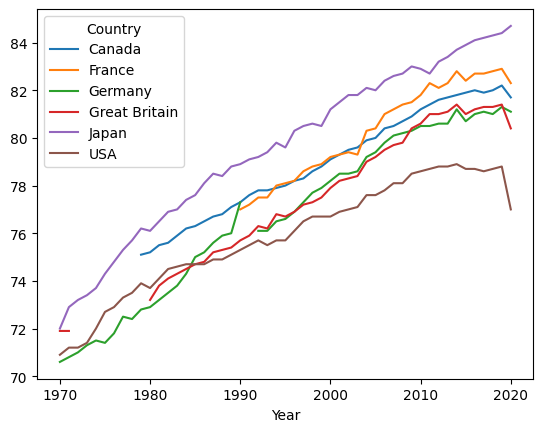

In [ ]:
# 나라별 기대수명 추세
df1['Life_Expectancy'].plot()

<Axes: xlabel='Year'>

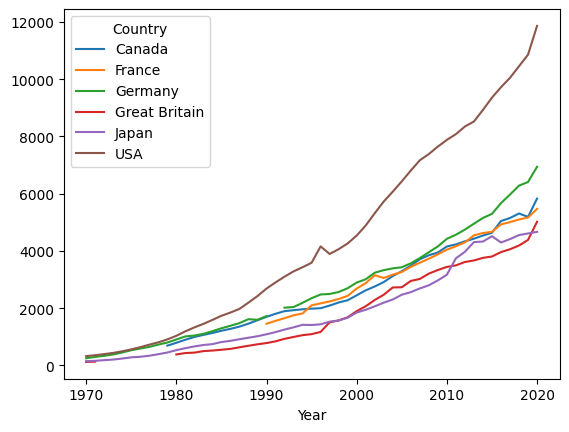

In [ ]:
# 나라별 소비..?
df1['Spending_USD'].plot()

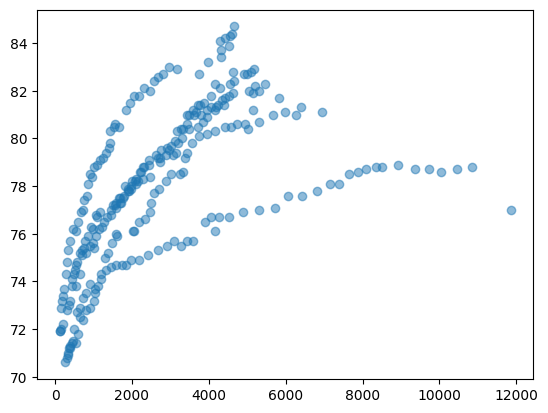

In [ ]:
# 두 변수간의 상관관계 알아보기
# 산점도 그리기
plt.scatter(df['Spending_USD'],df['Life_Expectancy'],alpha = 0.5)

In [ ]:
from numpy.ma.core import sqrt
# 상관관계 지표 - 피어슨 상관계수 함수 작성
def pearson(df1,df2):
  var1_mean = df1.mean()
  var2_mean = df2.mean()
  Sxy = sum((df1-var1_mean)*(df2-var2_mean))/(len(df1)-1)
  Sx = sqrt(sum((df1-var1_mean)**2)/(len(df1)-1))
  Sy = sqrt(sum((df2-var2_mean)**2)/(len(df2)-1))
  print(Sxy,Sx*Sy)
  Rxy = Sxy/(Sx*Sy)
  return Rxy
pearson(df['Life_Expectancy'],df['Spending_USD'])

4166.800911526428 7191.201028289141


0.5794304588530953

In [ ]:
# numpy library - 피어슨 상관계수
import numpy as np
print(np.cov(df['Life_Expectancy'],df['Spending_USD'])[0,1])
print(np.corrcoef(df['Life_Expectancy'],df['Spending_USD'])[0,1])

4166.80091152643
0.5794304588530952


In [ ]:
# 상관관계의 검정 - Pvalue
import scipy.stats as stats
stats.pearsonr(df['Life_Expectancy'],df['Spending_USD'])
# scipy를 활용하면 상관계수(표준화된 공분산)와 pvalue를 동시에 출력

PearsonRResult(statistic=0.5794304588530952, pvalue=5.704081208901827e-26)

    🧾요약
      - 간단하게 퀴즈 데이터를 가지고 데이터를 살펴보았다.
      - 기대 수명과 GDP에서 소비(?)에 해당하는 변수는 뚜렷한 양의 상관관계가 있다.
      - 귀무가설 " 기대수명과 소비는 상관관계가 없다" 에 대한 검정 결과 p-value값은 0에 매우 가깝기 때문에 귀무가설을 기각할 수 있다. 상관관계가 있다라는 대립가설을 채택한다.
      - 그런데 소비가 가장 높은 미국이 다른 국가들에 비해 낮은 기대수명 추세를 보이고 소비가 가장 낮은 일본이 가장 높은 기대수명 추세를 보였다.
      - 즉 소비가 많은 사람들이 기대수명도 높게 나타나지만 기대수명에 영향을 주는 다른 요인도 있을 것으로 보인다.

## 문제 3
  📌Q3. Jupyter notebook 은 문서와 코드를 함께 작성할 수 있다는 점이 장점입니다. Jupyter notebook 에서 지원하는 Markdown 문법을 사용하여, 이번 주에 배운 내용을 정리해 보세요!

- Pandas를 통한 파일 저장과 불러오기

  - to_csv("파일명", index=False) : csv 파일로 저장하기
  - read_csv("파일명") : csv 파일 불러오기
  - shape를 통한 행과 열의 수 보기
  - head, tail, sample 을 통한 일부 데이터 가져오기

- DataFrame의 info(), describe() 등을 통한 요약과 기술통계 값 구하기
  - info()
  - describe()
  - nunique()
  - index
  - columns
  - values

- Pandas의 DataFrame과 Series의 이해
  - Series : 1차원 벡터구조
  - DataFrame : 2차원 행렬구조
- 색인하기
  - [컬럼]
  - .loc[행]
  - .loc[행, 열]
  - .loc[조건식, 열]
- DataFrame의 데이터 타입 이해하기
  - 날짜 데이터의 변환
- DataFrame 다루기
  - 열(column) 인덱싱
  - 행(index) 인덱싱
  - 행, 열 인덱싱
  - 정렬하기 : sort_values 사용하기
  - 조건식 사용하기
- 빈도수 구하기
  - 한 개의 변수 : series.value_counts()
  - 두 개의 변수 : pd.crosstab()
- groupby 와 pivot_table
  - 다양한 연산식의 사용